In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [ ]:
df.shape

(303, 14)

In [ ]:
fig = px.histogram(df, x='age', nbins=20, title='Distribution of Age',
labels={'age': 'Age'}, template='plotly_dark')
fig.show()

In [ ]:
fig = px.bar(df, x='trestbps', title='Distribution of Blood Pressure', color='trestbps',
template='plotly_dark')
fig.show()

<Figure size 1000x800 with 0 Axes>

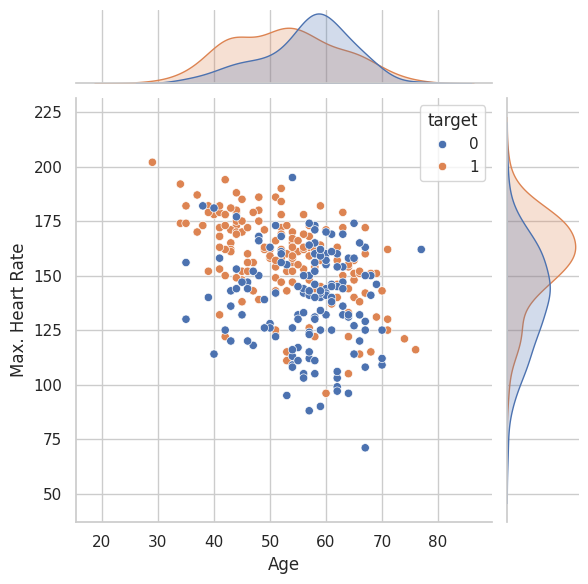

<Figure size 1000x800 with 0 Axes>

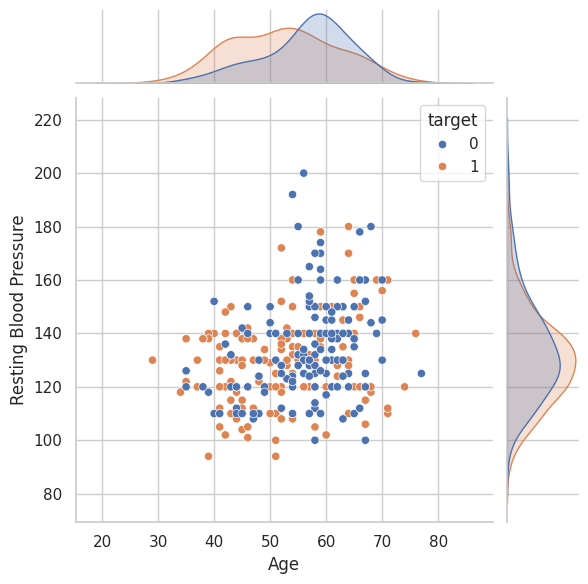

<Figure size 1000x800 with 0 Axes>

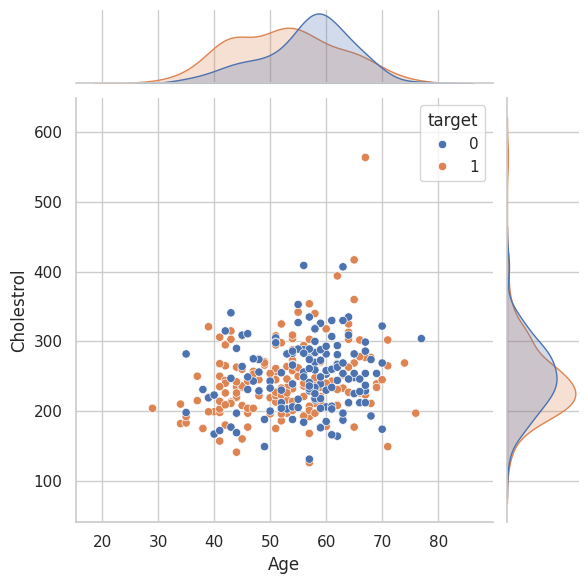

In [ ]:
# jointplot for 'Age' vs 'Max. Heart Rate'
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='age',y='thalach',hue='target')
plt.xlabel("Age")
plt.ylabel('Max. Heart Rate')
plt.show()

# jointplot for 'Age' vs 'Blood Pressure'
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='age',y='trestbps',hue='target')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

# jointplot for 'Age' vs 'Cholesterol'
plt.figure(figsize=(10,8))
sns.jointplot(data=df,x='age',y='chol',hue='target')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

Text(0.5, 1.02, 'Pairplot of Features with Hue as Heart Disease')

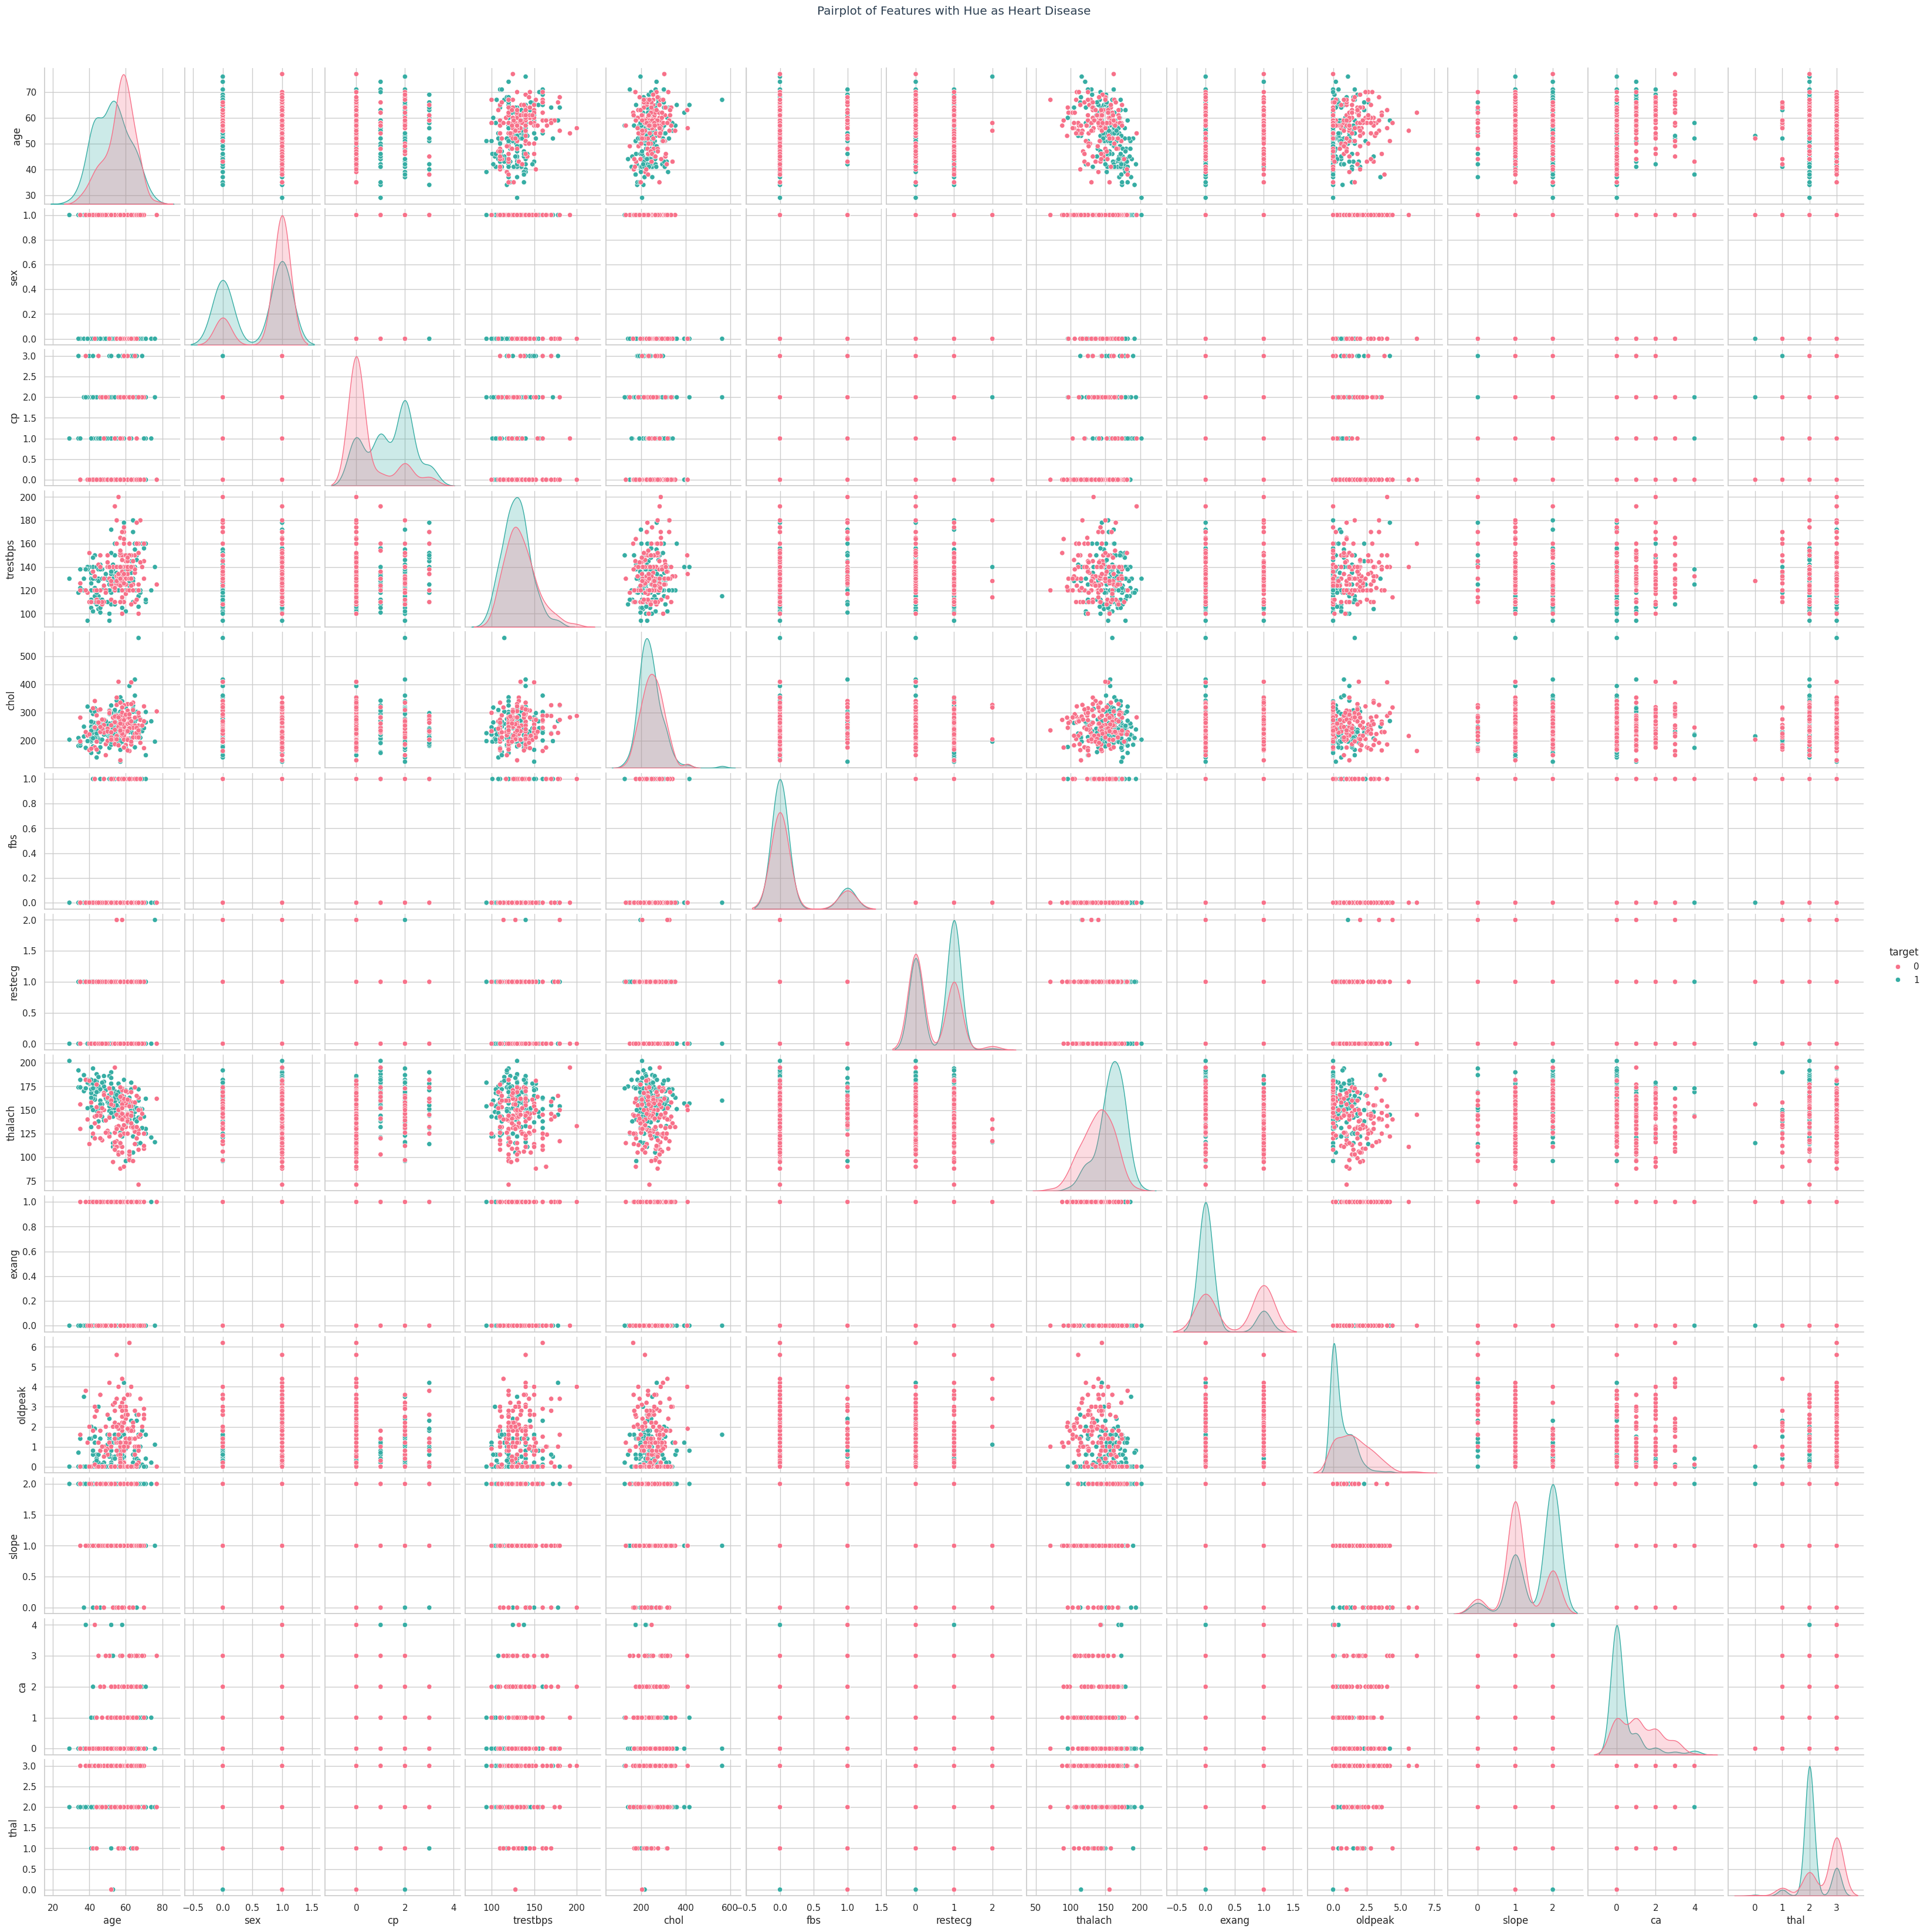

In [ ]:
sns.set_theme(style="whitegrid")
sns.pairplot(df, hue='target', palette='husl')
plt.suptitle('Pairplot of Features with Hue as Heart Disease', y=1.02,color='#2c3e50')

In [ ]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

KeyError: "['heart disease'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image
from six import StringIO

In [ ]:
y_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
class_report = classification_report(y_test,y_pred)
print(class_report)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True, cmap='inferno', linewidths=.5, fmt='g')